In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from numpy import *
#from IPython.html.widgets import *
from ipywidgets import *
from IPython.display import display
import matplotlib.pyplot as plt
from IPython.core.display import clear_output

## Create dataset

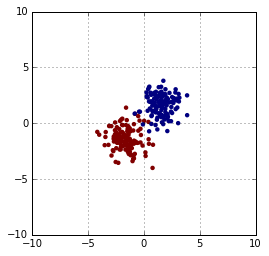

In [3]:
from sklearn.datasets import make_blobs

X = y = None # Global variables
@interact
def plot_blobs(n_samples=(10, 500),
               center1_x=1.5,
               center1_y=1.5,
               center2_x=-1.5,
               center2_y=-1.5):
    centers=array([[center1_x, center1_y],[center2_x, center2_y]])
    global X, y 
    X, y= make_blobs(n_samples=n_samples, n_features=2,
                      centers=centers, cluster_std=1.0)
    y = y*2 - 1  # To convert to {-1, 1}
    
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='none')
    plt.xlim([-10,10]); plt.ylim([-10,10]); plt.grid()
    plt.axes().set_aspect('equal')

## Train

In [4]:
from sklearn.cross_validation import train_test_split

# Plotting routine for perceptron training
def predict(w, X):
    """Returns the predictions."""
    return sign(dot(c_[X, ones((X.shape[0], 1))], w))
    
def error01(w, X, y):
    """Calculates the mean 0/1 error."""
    return 1.0 - (predict(w, X) == y).mean()

def perceptron_training(X,y,eta=0.1):
    global w, errors
    
    # Split data to training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Plot the current predictions and the hyperplane
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].scatter(X_train[:,0], X_train[:,1], c=predict(w, X_train), edgecolor='none')
    axs[0].set_xlim([-10,10]); axs[0].set_ylim([-10,10]); axs[0].grid()
    axs[0].set_aspect('equal')
    
    # Draw the separating line
    cw=-w[2]/(w[0]**2+w[1]**2)
    ts=array([-100.0,100.0])
    axs[0].plot(-w[1]*ts+w[0]*cw, w[0]*ts+w[1]*cw, linestyle='--', color='r')
    axs[0].arrow(w[0]*cw,w[1]*cw, w[0], w[1], 
            head_width=0.5, head_length=0.5, fc='r', ec='r')    
    
    # Plot the classification errors
    train_error, test_error = [error01(w, X_, y_) for X_, y_ in [[X_train, y_train], [X_test, y_test]]]
    errors = r_[errors, array([train_error, test_error])[newaxis,:]]
    axs[1].plot(errors)
    axs[1].set_title('Classification Errors')
    axs[1].set_ylim([0,1])
    axs[1].legend(['Training','Test'])
    
    # Update w
    w = update_w_all(w, X_train, y_train, eta)
